In [1]:
import pandas as pd

def read_world_bank_data(filename):
    # Read the World Bank dataset from the online source
    url = 'https://climateknowledgeportal.worldbank.org/api/data/get-download-data/historical/{0}/1901-2016/10/10/csv'.format(filename)
    data = pd.read_csv(url)

    # Transpose the dataframe and split it into two dataframes
    df_years = data.set_index(['ISO3', 'Variable']).T
    df_countries = data.set_index(['Variable', 'ISO3'])

    # Clean the transposed dataframe
    df_years.columns = df_years.columns.droplevel(0)
    df_countries.index = df_countries.index.droplevel(1)

    return df_years, df_countries

In [2]:
import pandas as pd

def read_world_bank_data(filename):
    # Read the World Bank dataset from a local file
    data = pd.read_csv(filename, skiprows=4)

    # Transpose the dataframe and split it into two dataframes
    df_years = data.set_index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']).T
    df_countries = data.set_index(['Indicator Name', 'Indicator Code']).drop(['Country Name', 'Country Code'], axis=1)

    # Clean the transposed dataframe
    df_years.columns = df_years.columns.droplevel([0, 1])
    df_countries.index = df_countries.index.droplevel([0])

    return df_years, df_countries

# Call the function with a filename to read the World Bank dataset
filename = r'H:\dataset\WorldBank\API_19_DS2_en_csv_v2_5361599.csv'
df_years, df_countries = read_world_bank_data(filename)

# Print the first five rows of the years dataframe
print(df_years.head())

# Print the first five rows of the countries dataframe
print(df_countries.head())

Indicator Name Urban population (% of total population) Urban population  \
Indicator Code                        SP.URB.TOTL.IN.ZS      SP.URB.TOTL   
1960                                             50.776          27728.0   
1961                                             50.761          28330.0   
1962                                             50.746          28764.0   
1963                                             50.730          29157.0   
1964                                             50.715          29505.0   

Indicator Name Urban population growth (annual %) Population, total  \
Indicator Code                        SP.URB.GROW       SP.POP.TOTL   
1960                                          NaN           54608.0   
1961                                     2.147858           55811.0   
1962                                     1.520329           56682.0   
1963                                     1.357042           57475.0   
1964                                     

In [9]:
import pandas as pd

filename = r'H:\dataset\WorldBank\API_19_DS2_en_csv_v2_5361599.csv'
data = pd.read_csv(filename, skiprows=4)

# Print out the unique values of the 'Indicator Code' column
print(data['Indicator Name'].unique())

# Define the indicators and countries of interest
indicators = ['Urban population', 'Population, total']
countries = ['United States', 'China', 'India']

# Check if the specified indicators are present in the dataset
if not set(indicators).issubset(set(data['Indicator Name'].unique())):
    raise ValueError("Specified indicators are not present in the dataset")

# Subset the data for the indicators and countries of interest
subset = data[(data['Country Name'].isin(countries)) & (data['Indicator Name'].isin(indicators))]
subset = subset[['Country Name', 'Indicator Name', '2019']]

# Rename columns to match indicators
subset = subset.rename(columns={'Indicator Name': 'Indicator', '2019': 'Value'})

# Pivot the data to create separate columns for each indicator
subset = subset.pivot(index='Country Name', columns='Indicator', values='Value')

# Compute summary statistics for the whole world
world_stats = subset.describe()

# Compute summary statistics for each country
country_stats = subset.describe()

# Print the summary statistics
print("Summary statistics for the whole world:")
print(world_stats)

print("\nSummary statistics for each country:")
print(country_stats)


['Urban population (% of total population)' 'Urban population'
 'Urban population growth (annual %)' 'Population, total'
 'Population growth (annual %)'
 'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)'
 'Prevalence of underweight, weight for age (% of children under 5)'
 'Community health workers (per 1,000 people)'
 'Mortality rate, under-5 (per 1,000 live births)'
 'Primary completion rate, total (% of relevant age group)'
 'School enrollment, primary and secondary (gross), gender parity index (GPI)'
 'Agriculture, forestry, and fishing, value added (% of GDP)'
 'CPIA public sector management and institutions cluster average (1=low to 6=high)'
 'Ease of doing business rank (1=most business-friendly regulations)'
 'Terrestrial and marine protected areas (% of total territorial area)'
 'Marine protected areas (% of territorial waters)'
 'Terrestrial protected areas (% of total land area)'
 'Annual freshwater withdrawals, total (% of internal resources)'
 'Annual f

In [10]:
import pandas as pd

# Read data from a CSV file into a DataFrame
df = pd.read_csv('H:\dataset\WorldBank\API_19_DS2_en_csv_v2_5361599.csv')

# Use describe() method to get summary statistics of the data
print(df.describe())


         Unnamed: 4    Unnamed: 5    Unnamed: 6    Unnamed: 7    Unnamed: 8  \
count  2.495000e+03  4.090000e+03  4.124000e+03  4.140000e+03  4.181000e+03   
mean   2.532608e+07  1.641231e+07  1.706648e+07  1.819740e+07  1.875965e+07   
std    1.976134e+08  1.663111e+08  1.757116e+08  1.921350e+08  1.998806e+08   
min   -3.667000e+00 -3.667000e+00 -3.667000e+00 -3.703670e+02 -3.667000e+00   
25%    4.035723e+00  3.626166e+00  3.667000e+00  3.698517e+00  3.667000e+00   
50%    5.717916e+01  4.294653e+01  4.313941e+01  4.323517e+01  4.316100e+01   
75%    2.005158e+04  2.265695e+03  2.326159e+03  2.330250e+03  2.330000e+03   
max    3.040000e+09  3.428000e+09  3.797000e+09  4.362000e+09  4.653000e+09   

         Unnamed: 9   Unnamed: 10   Unnamed: 11   Unnamed: 12   Unnamed: 13  \
count  4.212000e+03  4.218000e+03  4.223000e+03  4.234000e+03  4.240000e+03   
mean   1.948203e+07  2.186218e+07  2.269768e+07  2.430580e+07  2.565626e+07   
std    2.106741e+08  2.505555e+08  2.610100e+08  2.

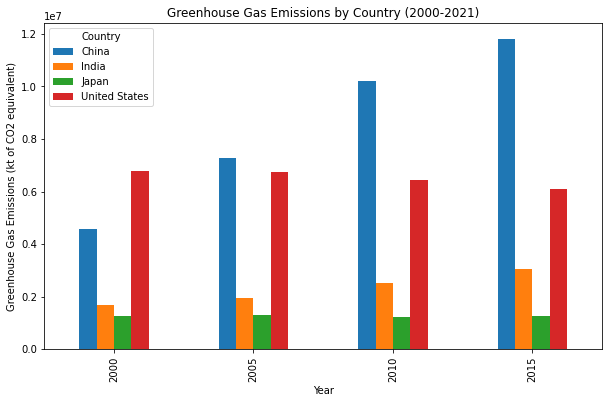

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset and subset to relevant indicators and countries
df = pd.read_csv('H:/dataset/WorldBank/API_19_DS2_en_csv_v2_5361599.csv', skiprows=4)
df = df[df['Indicator Code'] == 'EN.ATM.GHGT.KT.CE']
df = df[df['Country Name'].isin(['United States', 'China', 'India', 'Japan'])]

# Subset to years 2000-2021 in five year increments
df = df.loc[:, ['Country Name', '2000', '2005', '2010','2015', '2021']]

# Pivot the data to create a multi-index DataFrame
df = df.set_index('Country Name').stack().reset_index()
df.columns = ['Country', 'Year', 'Value']
df = df.pivot(index='Year', columns='Country', values='Value')

# Plot the bar graph
ax = df.plot(kind='bar', figsize=(10,6))
ax.set_xlabel('Year')
ax.set_ylabel('Greenhouse Gas Emissions (kt of CO2 equivalent)')
ax.set_title('Greenhouse Gas Emissions by Country (2000-2021)')
plt.show()


<Figure size 720x432 with 0 Axes>

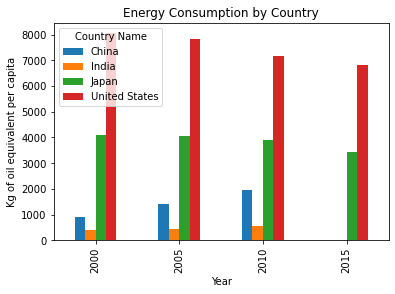

In [46]:
#Load the dataset
df = pd.read_csv('H:/dataset/WorldBank/API_19_DS2_en_csv_v2_5361599.csv', skiprows=4)

#Select relevant indicators and countries
indicators = ['EG.USE.PCAP.KG.OE']
countries = ['United States', 'China', 'India', 'Japan', 'russia']

#Subset the data
df = df[df['Indicator Code'].isin(indicators) & df['Country Name'].isin(countries)]
df = df[['Country Name', '2000', '2005', '2010','2015']] # Include only relevant columns

#Pivot the data to create a multi-index DataFrame
df = df.set_index('Country Name').T

#Plot the energy consumption bar graph for the selected countries
#ax = df.plot(kind='bar', figsize=(10,6))
plt.figure(figsize=(10,6))
df.plot(kind='bar')
plt.title('Energy Consumption by Country')
plt.xlabel('Year')
plt.ylabel('Kg of oil equivalent per capita')
plt.show()

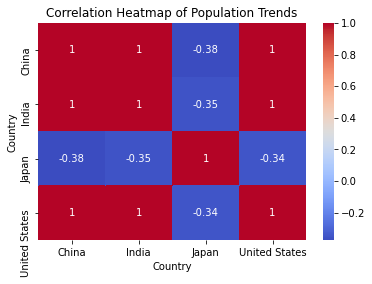

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('H:/dataset/WorldBank/API_19_DS2_en_csv_v2_5361599.csv', skiprows=4)

# Subset to population data
df = df[df['Indicator Code'] == 'SP.POP.TOTL']
df = df[df['Country Name'].isin(['United States', 'China', 'India', 'Japan'])]

# Subset to years 2000-2021 in five year increments
years = ['2000', '2005', '2010', '2015', '2020']
df = df.loc[:, ['Country Name'] + years]

# Pivot the data to create a multi-index DataFrame
df = df.set_index('Country Name').stack().reset_index()
df.columns = ['Country', 'Year', 'Population']

# Create a pivot table with population by year for each country
pop_pivot = df.pivot(index='Year', columns='Country', values='Population')

# Calculate the correlation matrix
corr_matrix = pop_pivot.corr()

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Population Trends')
plt.show()


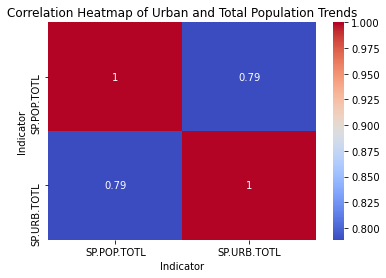

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Load the dataset
df = pd.read_csv('H:/dataset/WorldBank/API_19_DS2_en_csv_v2_5361599.csv', skiprows=4)

#Subset to urban population and total population data
df = df[df['Indicator Code'].isin(['SP.URB.TOTL', 'SP.POP.TOTL'])]
df = df[df['Country Name'].isin(['United States', 'China', 'India', 'Japan'])]

#Subset to years 1960-2020 in ten year increments
years = list(range(1960, 2021, 10))
df = df.loc[:, ['Country Name', 'Indicator Code'] + [str(year) for year in years]]

#Pivot the data to create a multi-index DataFrame
df = df.set_index(['Country Name', 'Indicator Code']).stack().reset_index()
df.columns = ['Country', 'Indicator', 'Year', 'Population']

#Create a pivot table with population by year and indicator for each country
pop_pivot = df.pivot(index=['Country', 'Year'], columns='Indicator', values='Population')

#Calculate the correlation matrix
corr_matrix = pop_pivot.corr()

#Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Urban and Total Population Trends')
plt.show()


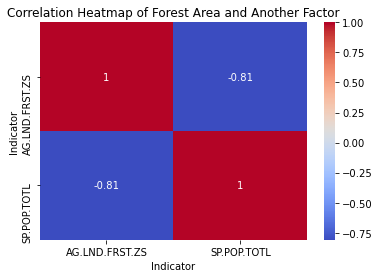

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('H:/dataset/WorldBank/API_19_DS2_en_csv_v2_5361599.csv', skiprows=4)

# Subset to forest area and another factor of interest
df = df[df['Indicator Code'].isin(['AG.LND.FRST.ZS', 'SP.POP.TOTL'])]
df = df[df['Country Name'].isin(['United States', 'China', 'India', 'Japan'])]

# Subset to years 1990-2020 in five year increments
years = list(range(1990, 2021, 5))
df = df.loc[:, ['Country Name', 'Indicator Code'] + [str(year) for year in years]]

# Pivot the data to create a multi-index DataFrame
df = df.set_index(['Country Name', 'Indicator Code']).stack().reset_index()
df.columns = ['Country', 'Indicator', 'Year', 'Value']

# Create a pivot table with values by year and indicator for each country
values_pivot = df.pivot(index=['Country', 'Year'], columns='Indicator', values='Value')

# Calculate the correlation matrix
corr_matrix = values_pivot.corr()

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Forest Area and Another Factor')
plt.show()


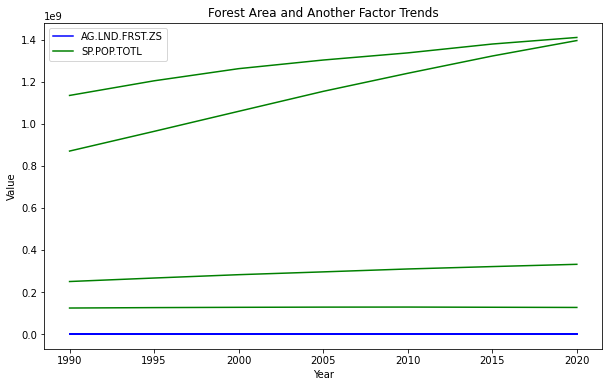

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('H:/dataset/WorldBank/API_19_DS2_en_csv_v2_5361599.csv', skiprows=4)

# Subset to forest area and another factor of interest
df = df[df['Indicator Code'].isin(['AG.LND.FRST.ZS', 'SP.POP.TOTL'])]
df = df[df['Country Name'].isin(['United States', 'China', 'India', 'Japan'])]

# Subset to years 1990-2020 in five year increments
years = list(range(1990, 2021, 5))
df = df.loc[:, ['Country Name', 'Indicator Code'] + [str(year) for year in years]]

# Pivot the data to create a multi-index DataFrame
df = df.set_index(['Country Name', 'Indicator Code']).stack().reset_index()
df.columns = ['Country', 'Indicator', 'Year', 'Value']

# Create a pivot table with values by year and indicator for each country
values_pivot = df.pivot(index=['Country', 'Year'], columns='Indicator', values='Value')

# Calculate the correlation matrix
corr_matrix = values_pivot.corr()

# Create the line graph
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['blue', 'green']
for i, indicator in enumerate(['AG.LND.FRST.ZS', 'SP.POP.TOTL']):
    for country in ['United States', 'China', 'India', 'Japan']:
        data = df[(df['Indicator']==indicator) & (df['Country']==country)]
        ax.plot(data['Year'], data['Value'], color=colors[i], label=indicator if country=='United States' else None)
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Value')
plt.title('Forest Area and Another Factor Trends')
plt.show()
